### ANN With Cutomer Churn Prediction- Classification

In [1]:
!pip install pandas

In [2]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [9]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
X.shape

(10000, 11)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [17]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [18]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform', activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation='relu'))



# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))



# Compiling the ANN
classifier.compile(  
                    optimizer = 'adam', 
                    loss = 'binary_crossentropy', 
                    metrics = ['accuracy']
                  )

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [20]:
X_train.shape

(8000, 11)

In [21]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100,verbose = 2)

Epoch 1/100
54/54 - 0s - loss: 0.7758 - accuracy: 0.5176 - val_loss: 0.6227 - val_accuracy: 0.6679
Epoch 2/100
54/54 - 0s - loss: 0.5942 - accuracy: 0.7110 - val_loss: 0.5386 - val_accuracy: 0.7637
Epoch 3/100
54/54 - 0s - loss: 0.5376 - accuracy: 0.7787 - val_loss: 0.5035 - val_accuracy: 0.7830
Epoch 4/100
54/54 - 0s - loss: 0.5054 - accuracy: 0.7970 - val_loss: 0.4837 - val_accuracy: 0.7940
Epoch 5/100
54/54 - 0s - loss: 0.4849 - accuracy: 0.8035 - val_loss: 0.4701 - val_accuracy: 0.7986
Epoch 6/100
54/54 - 0s - loss: 0.4703 - accuracy: 0.8067 - val_loss: 0.4609 - val_accuracy: 0.7978
Epoch 7/100
54/54 - 0s - loss: 0.4593 - accuracy: 0.8084 - val_loss: 0.4545 - val_accuracy: 0.7982
Epoch 8/100
54/54 - 0s - loss: 0.4503 - accuracy: 0.8108 - val_loss: 0.4491 - val_accuracy: 0.8005
Epoch 9/100
54/54 - 0s - loss: 0.4428 - accuracy: 0.8140 - val_loss: 0.4445 - val_accuracy: 0.8016
Epoch 10/100
54/54 - 0s - loss: 0.4366 - accuracy: 0.8151 - val_loss: 0.4404 - val_accuracy: 0.8039
Epoch 11/

54/54 - 0s - loss: 0.3238 - accuracy: 0.8651 - val_loss: 0.3700 - val_accuracy: 0.8470
Epoch 84/100
54/54 - 0s - loss: 0.3244 - accuracy: 0.8638 - val_loss: 0.3682 - val_accuracy: 0.8478
Epoch 85/100
54/54 - 0s - loss: 0.3239 - accuracy: 0.8638 - val_loss: 0.3679 - val_accuracy: 0.8501
Epoch 86/100
54/54 - 0s - loss: 0.3229 - accuracy: 0.8638 - val_loss: 0.3676 - val_accuracy: 0.8501
Epoch 87/100
54/54 - 0s - loss: 0.3232 - accuracy: 0.8636 - val_loss: 0.3679 - val_accuracy: 0.8478
Epoch 88/100
54/54 - 0s - loss: 0.3226 - accuracy: 0.8642 - val_loss: 0.3686 - val_accuracy: 0.8459
Epoch 89/100
54/54 - 0s - loss: 0.3228 - accuracy: 0.8638 - val_loss: 0.3676 - val_accuracy: 0.8478
Epoch 90/100
54/54 - 0s - loss: 0.3224 - accuracy: 0.8643 - val_loss: 0.3679 - val_accuracy: 0.8470
Epoch 91/100
54/54 - 0s - loss: 0.3227 - accuracy: 0.8647 - val_loss: 0.3674 - val_accuracy: 0.8482
Epoch 92/100
54/54 - 0s - loss: 0.3219 - accuracy: 0.8647 - val_loss: 0.3680 - val_accuracy: 0.8493
Epoch 93/100


In [22]:
# Fitting the ANN to the Training set
model_history = classifier.fit(
                               X_train, y_train,
                               validation_data=(X_test,y_test), 
                               batch_size = 100,
                               epochs = 100,
                               verbose = 2
                               #callbacks = [histories]
                              )

Epoch 1/100
80/80 - 0s - loss: 0.3361 - accuracy: 0.8593 - val_loss: 0.3432 - val_accuracy: 0.8575
Epoch 2/100
80/80 - 0s - loss: 0.3349 - accuracy: 0.8612 - val_loss: 0.3433 - val_accuracy: 0.8535
Epoch 3/100
80/80 - 0s - loss: 0.3343 - accuracy: 0.8616 - val_loss: 0.3409 - val_accuracy: 0.8580
Epoch 4/100
80/80 - 0s - loss: 0.3342 - accuracy: 0.8604 - val_loss: 0.3402 - val_accuracy: 0.8565
Epoch 5/100
80/80 - 0s - loss: 0.3335 - accuracy: 0.8629 - val_loss: 0.3401 - val_accuracy: 0.8570
Epoch 6/100
80/80 - 0s - loss: 0.3326 - accuracy: 0.8630 - val_loss: 0.3420 - val_accuracy: 0.8550
Epoch 7/100
80/80 - 0s - loss: 0.3324 - accuracy: 0.8627 - val_loss: 0.3402 - val_accuracy: 0.8555
Epoch 8/100
80/80 - 0s - loss: 0.3320 - accuracy: 0.8631 - val_loss: 0.3412 - val_accuracy: 0.8540
Epoch 9/100
80/80 - 0s - loss: 0.3315 - accuracy: 0.8629 - val_loss: 0.3415 - val_accuracy: 0.8550
Epoch 10/100
80/80 - 0s - loss: 0.3315 - accuracy: 0.8630 - val_loss: 0.3420 - val_accuracy: 0.8540
Epoch 11/

80/80 - 0s - loss: 0.3178 - accuracy: 0.8681 - val_loss: 0.3347 - val_accuracy: 0.8620
Epoch 84/100
80/80 - 0s - loss: 0.3179 - accuracy: 0.8686 - val_loss: 0.3333 - val_accuracy: 0.8645
Epoch 85/100
80/80 - 0s - loss: 0.3179 - accuracy: 0.8681 - val_loss: 0.3360 - val_accuracy: 0.8615
Epoch 86/100
80/80 - 0s - loss: 0.3173 - accuracy: 0.8677 - val_loss: 0.3346 - val_accuracy: 0.8605
Epoch 87/100
80/80 - 0s - loss: 0.3173 - accuracy: 0.8700 - val_loss: 0.3327 - val_accuracy: 0.8640
Epoch 88/100
80/80 - 0s - loss: 0.3171 - accuracy: 0.8673 - val_loss: 0.3364 - val_accuracy: 0.8615
Epoch 89/100
80/80 - 0s - loss: 0.3171 - accuracy: 0.8675 - val_loss: 0.3345 - val_accuracy: 0.8635
Epoch 90/100
80/80 - 0s - loss: 0.3173 - accuracy: 0.8685 - val_loss: 0.3340 - val_accuracy: 0.8640
Epoch 91/100
80/80 - 0s - loss: 0.3172 - accuracy: 0.8674 - val_loss: 0.3329 - val_accuracy: 0.8605
Epoch 92/100
80/80 - 0s - loss: 0.3170 - accuracy: 0.8690 - val_loss: 0.3323 - val_accuracy: 0.8635
Epoch 93/100


In [23]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


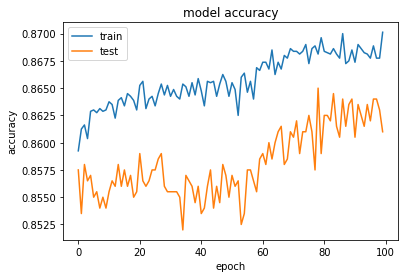

In [24]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

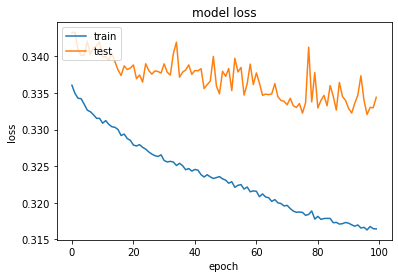

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,r2_score

print("classification_report : ",classification_report(y_test, y_pred))
print("r2_score : ",r2_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[1507,   88],
       [ 190,  215]], dtype=int64)

Text(69.0, 0.5, 'true ')

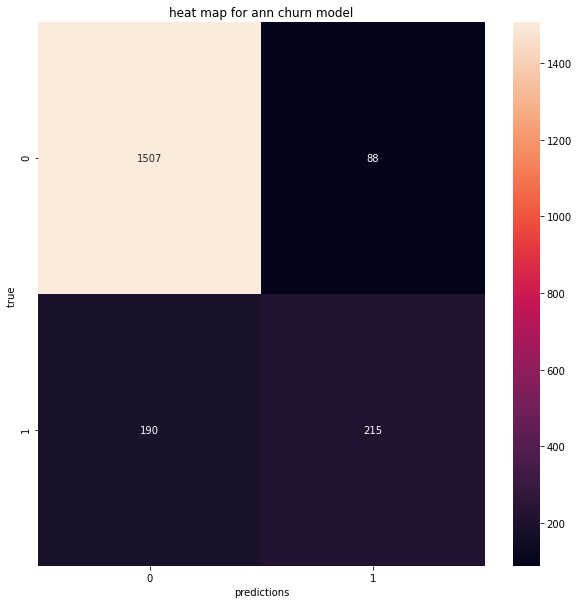

In [33]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("heat map for ann churn model")
plt.xlabel("predictions")
plt.ylabel("true ")

In [34]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [35]:
score

0.861

In [ ]:
why we use fit_transform for training data not for testing data it is because test data has two disadvantages
1.data leakage 
2.to overcome the over fitting problem
3.

### Batch Normalization

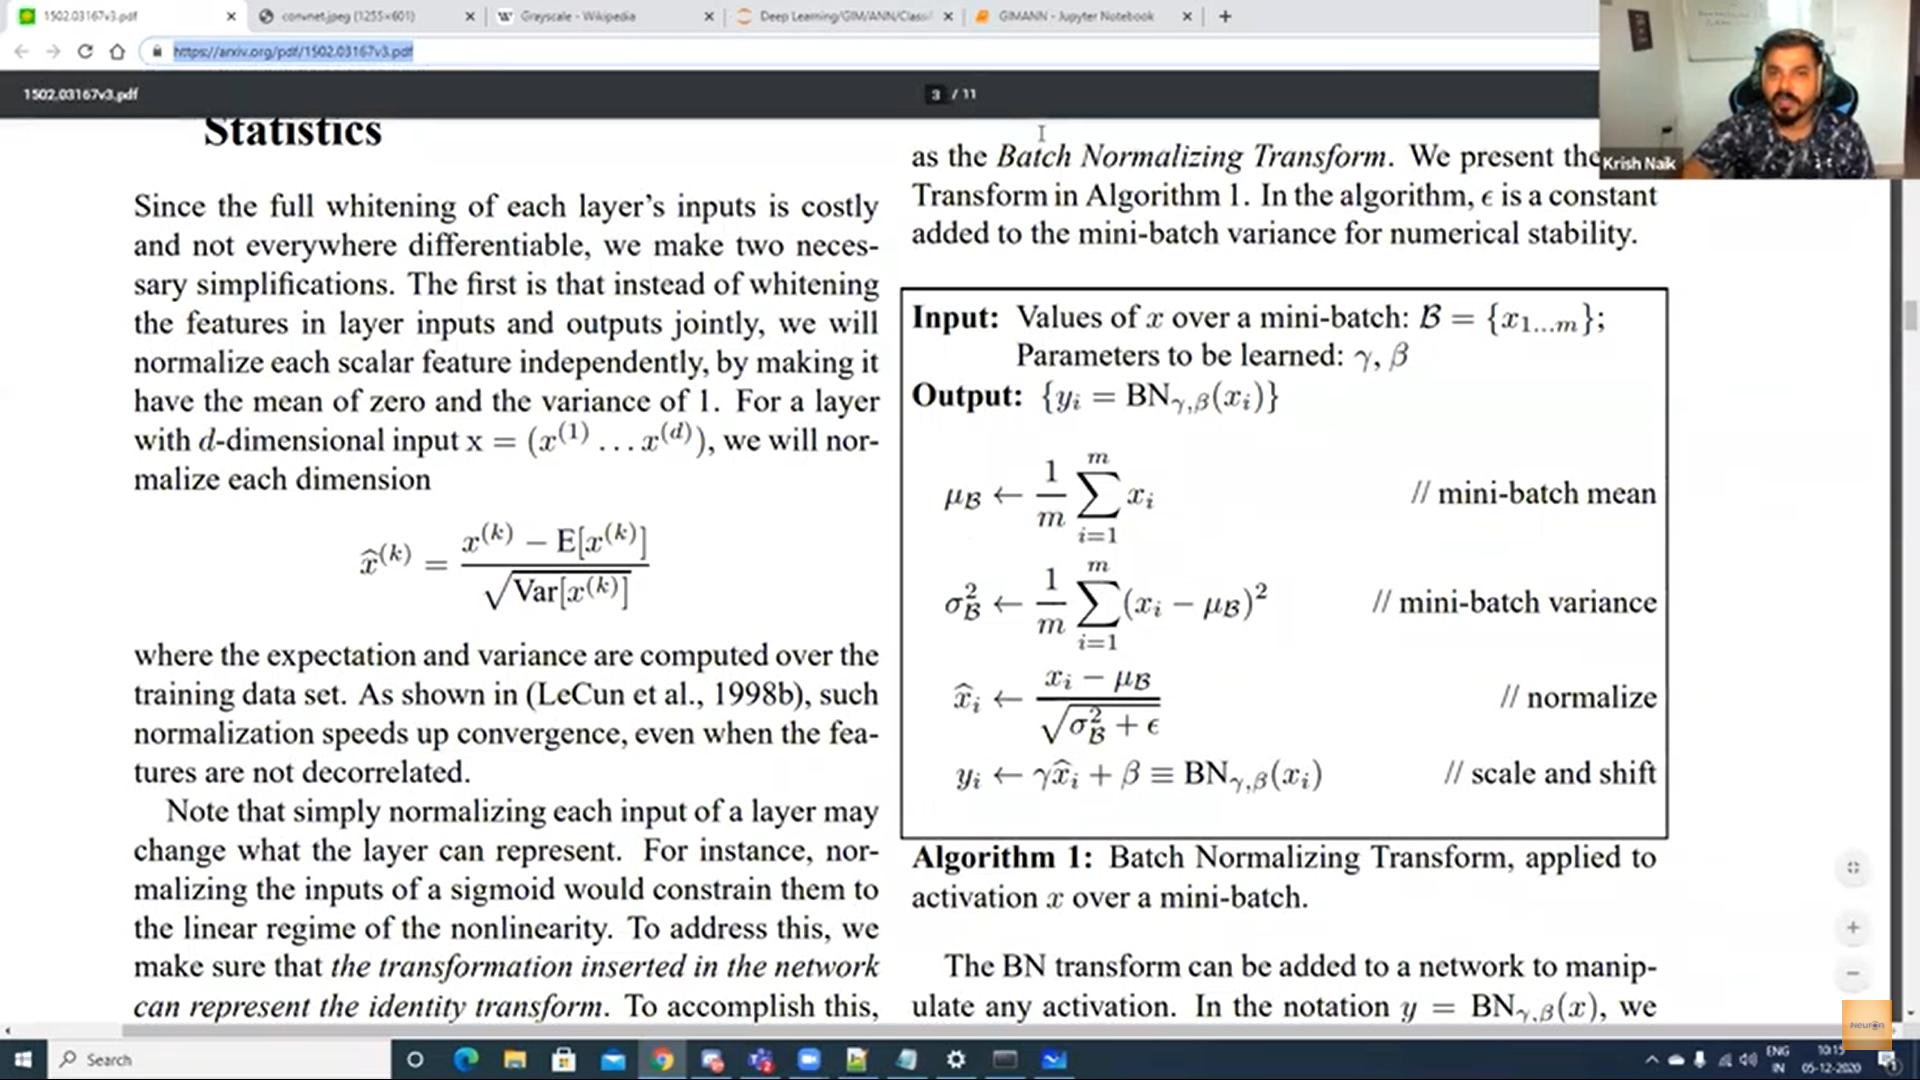


In [2]:
import  tensorflow

from tensorflow import keras

In [ ]:
what are the uses of the filters